<a href="https://colab.research.google.com/github/Thiraput01/Dig_img/blob/main/homework1_6530143721.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework #1

* copy this file into your drive
```
File -> Save a copy in Drive
```
* write the code in the cells provided for each questions
* <font color="red"> DO NOT DELETE or MODIFY </font> the first line of each cell (will be used to mark your homework, otherwise you will get 0)
* <font color="red"> DO NOT DELETE or MODIFY </font> function name, function input, and function output (return). Otherwise, you will get 0.
* <font color="red"> DO NOT ADD </font> anything outside the function. Otherwise, you will get 0.
* Make sure homework1_1-1_4 can run properly and can be tested with any image (not rely just on your images); otherwise, your homework will not be marked.

In [22]:
!wget https://drive.google.com/uc?id=1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe -O kitty.jpg
!wget https://drive.google.com/uc?id=1mIO58Oat2rxLg-c82eN2TLH8sTucQJGI -O noisy_ct.jpg
!wget https://drive.google.com/uc?id=1BNU8_HhPZ96PlImDia8u59QDR4V9wNwb -O amoeba.jpg
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1ozb5TYODuiF164jefijAoNpG7DjyzkGE' -O demo.jpg

--2024-08-31 03:38:02--  https://drive.google.com/uc?id=1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe
Resolving drive.google.com (drive.google.com)... 173.194.174.138, 173.194.174.100, 173.194.174.101, ...
Connecting to drive.google.com (drive.google.com)|173.194.174.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe [following]
--2024-08-31 03:38:03--  https://drive.usercontent.google.com/download?id=1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 64.233.188.132, 2404:6800:4008:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|64.233.188.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79570 (78K) [image/jpeg]
Saving to: ‘kitty.jpg’

kitty.jpg           100%[===================>]  77.71K  --.-KB/s    in 0.01s   

2024-08-31 03:38:05 (6.55 MB/s) - ‘kitty.jpg’ sav

In [9]:
# homework1_1 --> do not modify/delete this first line and do not add anything before this line

# import library for 1.1
import cv2
import numpy as np
import matplotlib.pyplot as plt



def homework1_1(rgb_image):
    # input -> rgb_image - type -> np.ndarray, size of - (height, width, 3) with dtype - uint8
    # output -> smoothed_img - type -> np.ndarray, size of - (height, width) with dtype - uint8
    #           mark_ROI - type -> np.ndarray, size of - (height, width) with dtype - uint8
    #           Gray_Level_img - type -> np.ndarray, size of - (height, width) with dtype - uint8


    # TO DO : You can use/modify the code guideline below or write your own code below here
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(rgb_image,cv2.COLOR_RGB2GRAY)

    # 1.1 Use the median filter to smooth the image
    smoothed_img = cv2.medianBlur(gray_image, 5)

    # 1.2 Make ROI with
    # Create an area of interest (ROI) using image slicing
    mark_ROI = smoothed_img[300:680,275:710]


    # 1.3 Use Gray Level slicing
    Gray_Level_img = np.zeros_like(mark_ROI)
    Gray_Level_img[(mark_ROI >= 220)]  = 255


    return smoothed_img, mark_ROI, Gray_Level_img



# Do not add anything outside the function in the submission

In [24]:
# homework1_2 --> do not modify/delete this first line and do not add anything before this line

def homework1_2(rgb_image):
    # input -> rgb_image - type -> np.ndarray, size of - (height, width, 3) with dtype - uint8
    # output -> filtered_image - type -> np.ndarray, size of - (height, width, 3) with dtype - uint8

    filtered_image = np.zeros((rgb_image.shape),dtype=np.uint8)

    # TO DO - Design your own filter here
    warm_filter = np.array([0.9, 0.9, 1.5]) #filter_1
    dark_factor = 0.8 #filter_2

    filtered_image = np.clip(rgb_image * warm_filter, 0, 255).astype(np.uint8)
    filtered_image = np.clip(filtered_image * dark_factor, 0, 255).astype(np.uint8)

    return filtered_image





# Do not add anything outside the function in the submission

In [44]:
# homework1_3 --> do not modify/delete this first line and do not add anything before this line

def homework1_3(gray_image):
  # input -> gray_image - type -> np.ndarray, size of - (height, width) with dtype - uint8
  # output -> laplacian_image - type -> np.ndarray, size of - (height, width) with dtype - uint8
  #           sharpen_image - type -> np.ndarray, size of - (height, width) with dtype - uint8

  laplacian_image = np.zeros((gray_image.shape))
  sharpen_image = np.zeros((gray_image.shape))

  # TO DO : generate and return laplacian image and shapening image
  laplacian_kernel = np.array([[-1, -1, -1],
                               [-1, 8, -1],
                               [-1, -1, -1]])

  laplacian_image = cv2.filter2D(gray_image, -1, laplacian_kernel)
  laplacian_image = np.clip(laplacian_image, 0, 255).astype(np.uint8)

  sharpen_image = cv2.add(gray_image, laplacian_image)
  sharpen_image = np.clip(sharpen_image, 0, 255).astype(np.uint8)

  return laplacian_image, sharpen_image

# Do not add anything outside the function in the submission


# Test our function here

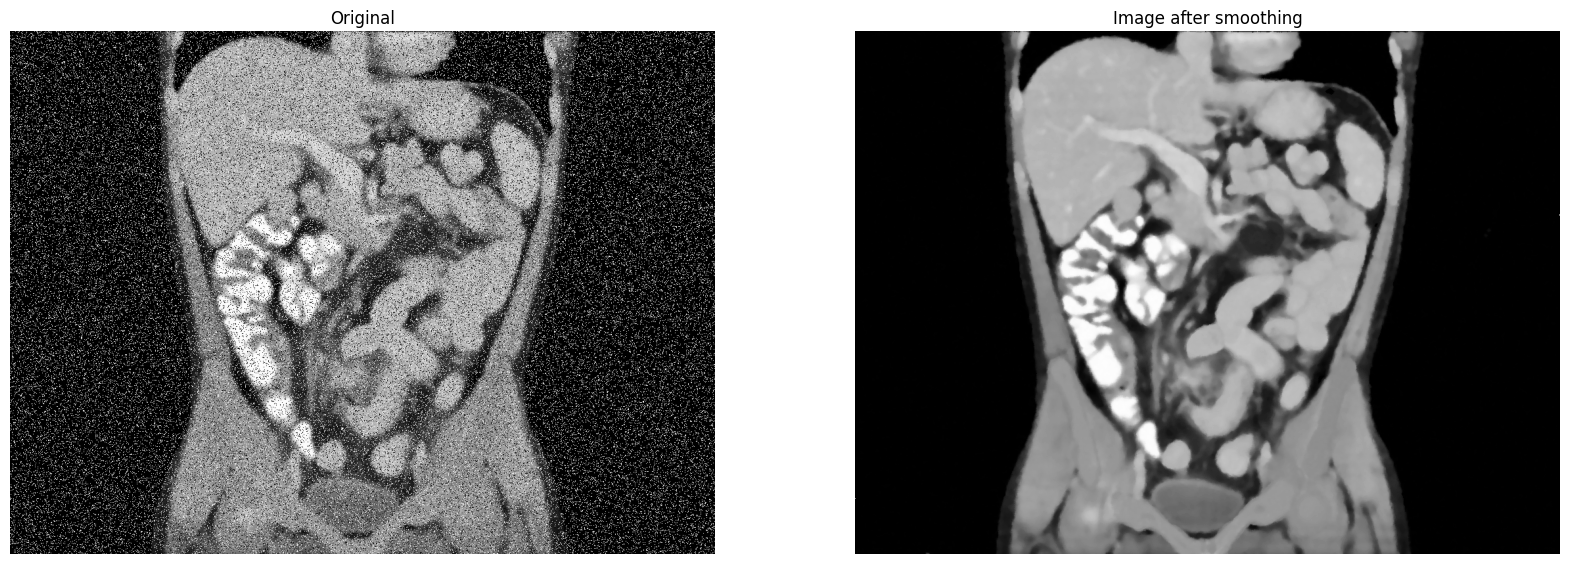

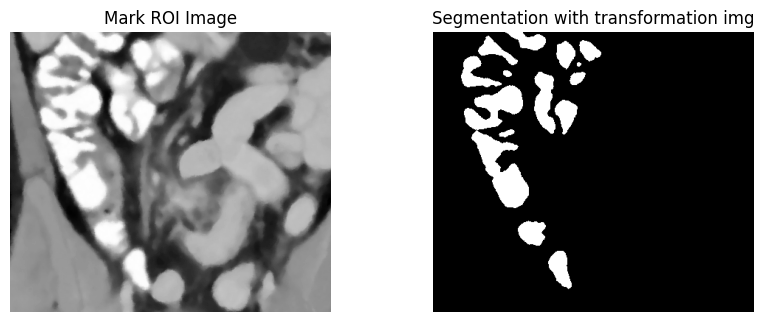

In [5]:
# test homework1_1
img1_1 = cv2.imread('noisy_ct.jpg')
smoothed_img, mark_ROI, Gray_Level_img = homework1_1(img1_1[:,:,::-1])
# Picture show Row1
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.imshow(img1_1[:, :, ::-1])
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(smoothed_img, cmap='gray')
plt.title('Image after smoothing')
plt.axis('off')

# Picture show Row2
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.imshow(mark_ROI, cmap='gray')
plt.title('Mark ROI Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(Gray_Level_img, cmap='gray')
plt.title('Segmentation with transformation img')
plt.axis('off')

plt.show()


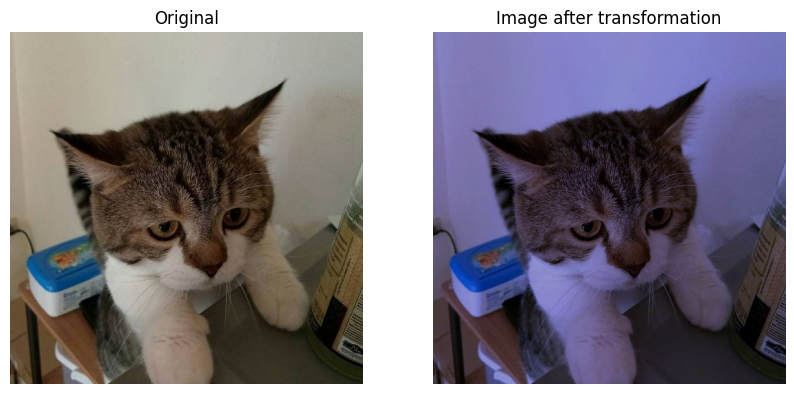

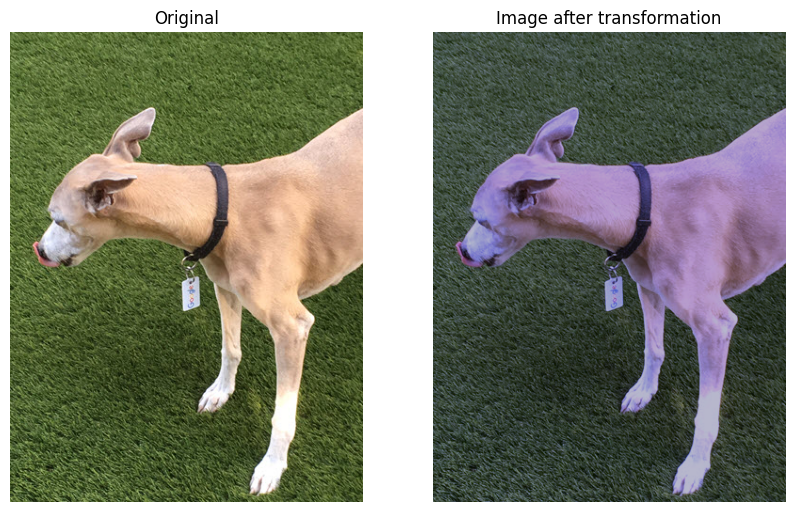

In [49]:
    # test homework1_2
img1_2 = cv2.imread("kitty.jpg")
img1_2 = img1_2[:, :, ::-1]

img_hw1_2 = homework1_2(img1_2)
my_img = cv2.imread("demo.jpg")
my_img = my_img[:, :, ::-1]

my_img_transform = homework1_2(my_img)

plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.imshow(img1_2)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_hw1_2)
plt.title('Image after transformation')
plt.axis('off')

plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.imshow(my_img)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(my_img_transform)
plt.title('Image after transformation')
plt.axis('off')

plt.show()

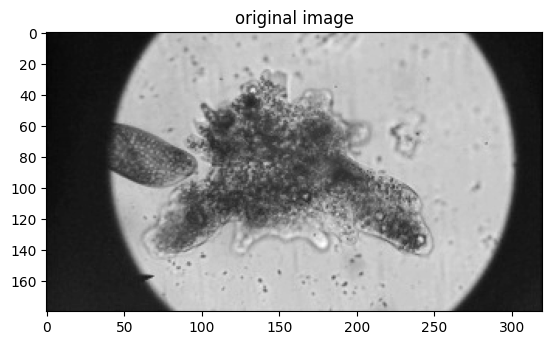

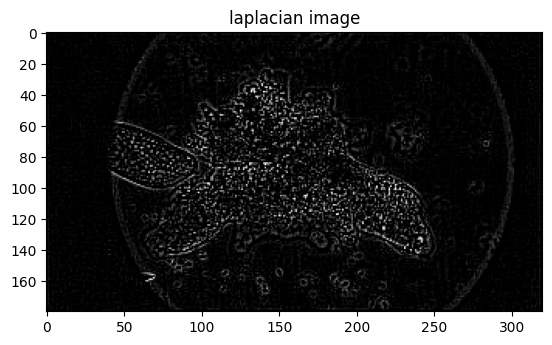

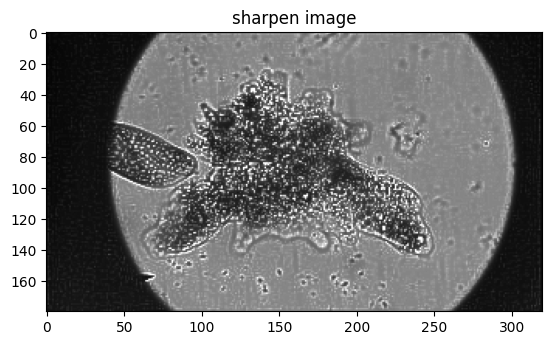

In [45]:
# test homework1_3
img1_3 = cv2.imread("amoeba.jpg")
img_gray13 = cv2.cvtColor(img1_3,cv2.COLOR_BGR2GRAY)
lap_image, sharpen_image = homework1_3(img_gray13)
plt.imshow(img_gray13, cmap = 'gray')
plt.title('original image')
plt.show()
plt.imshow(lap_image, cmap = 'gray')
plt.title('laplacian image')
plt.show()
plt.imshow(sharpen_image, cmap = 'gray')
plt.title('sharpen image')
plt.show()

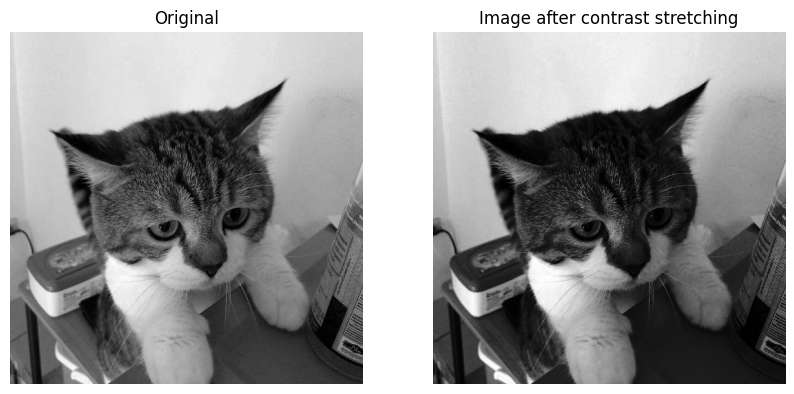

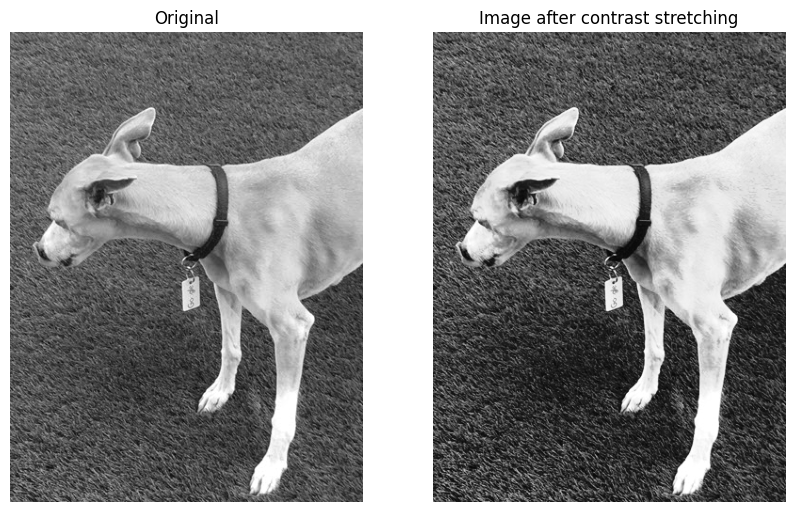

In [52]:
# homework1_4 (optional)

def contrast_stretching(gray_image, r1, s1, r2, s2, L=256):

    # Create an output image array
    output_image = np.zeros_like(gray_image, dtype=np.uint8)

    # Define the piecewise linear transformation function
    def transform(r):
        if r <= r1:
            return (s1 / r1) * r
        elif r1 < r <= r2:
            return ((s2 - s1) / (r2 - r1)) * (r - r1) + s1
        else:
            return ((L - 1 - s2) / (L - 1 - r2)) * (r - r2) + s2

    # Apply the transformation function to all pixel values
    transformed_values = np.vectorize(transform)(np.arange(L))

    # Map the original gray image values to their new values
    output_image = transformed_values[gray_image]

    return output_image

# Example usage:
# Load a grayscale image (replace with your image loading code)
gray_image = cv2.imread('kitty.jpg', cv2.IMREAD_GRAYSCALE)
my_gray_img = cv2.imread('demo.jpg', cv2.IMREAD_GRAYSCALE)

# Parameters from the graph (example values)
r1, s1 = 64, 32
r2, s2 = 192, 224

stretched_image = contrast_stretching(gray_image, r1, s1, r2, s2)
my_stretched_image = contrast_stretching(my_gray_img, r1, s1, r2, s2)

plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(stretched_image, cmap='gray')
plt.title('Image after contrast stretching')
plt.axis('off')

plt.show()

plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.imshow(my_gray_img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(my_stretched_image, cmap='gray')
plt.title('Image after contrast stretching')
plt.axis('off')

plt.show()


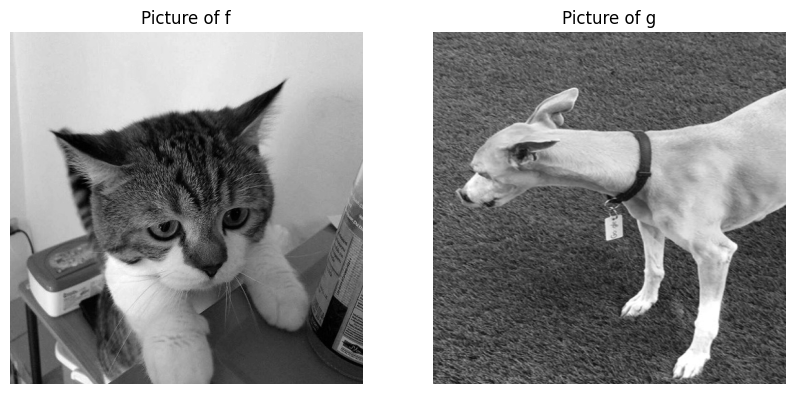

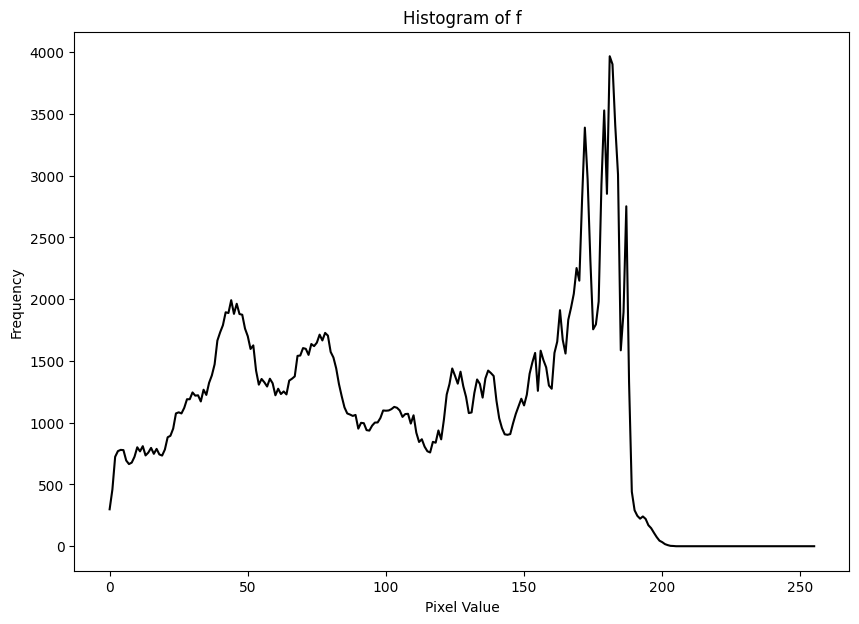

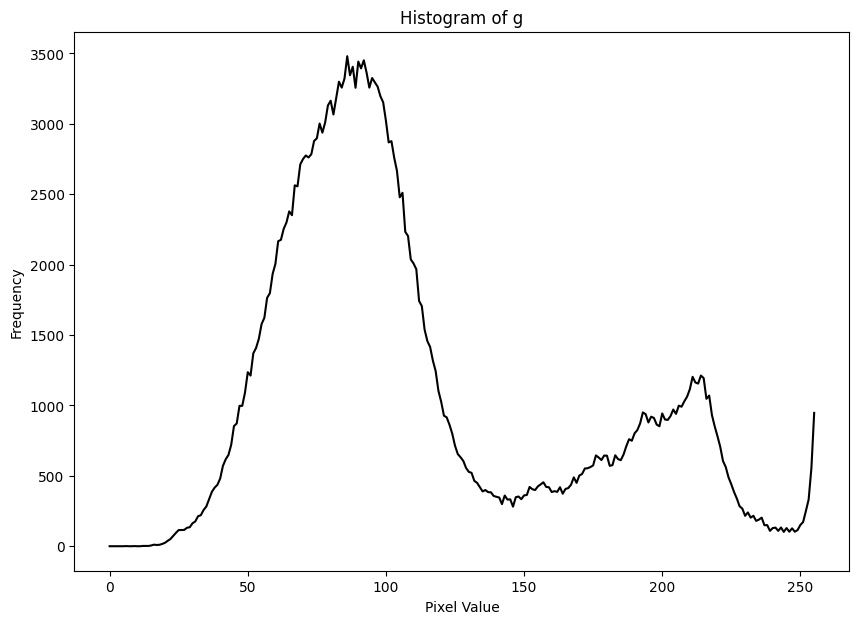

In [78]:
# homework1_5 (optional)

# Read images in grayscale
f = cv2.imread('kitty.jpg', cv2.IMREAD_GRAYSCALE)
g_init = cv2.imread('demo.jpg', cv2.IMREAD_GRAYSCALE)

g = cv2.resize(g_init, (f.shape[1], f.shape[0]))

# Calculate histograms
hist_f = cv2.calcHist([f], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])

def plot_histogram(hist, title):
    plt.figure(figsize=(10, 7))
    plt.plot(hist, color='black')
    plt.title(title)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

# Display images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(f, cmap='gray')
plt.title('Picture of f')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(g, cmap='gray')
plt.title('Picture of g')
plt.axis('off')

plt.show()

# Plot histograms separately
plot_histogram(hist_f, 'Histogram of f')
plot_histogram(hist_g, 'Histogram of g')


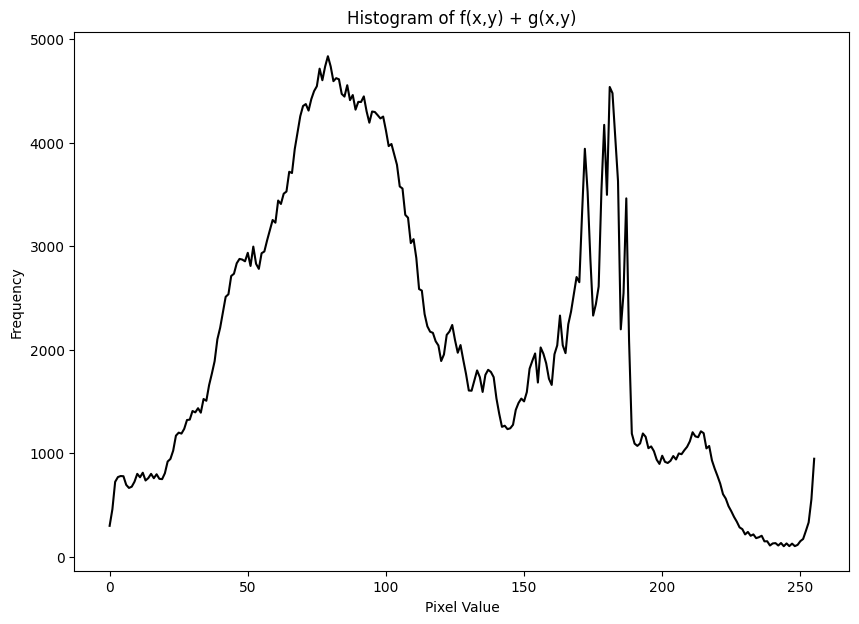

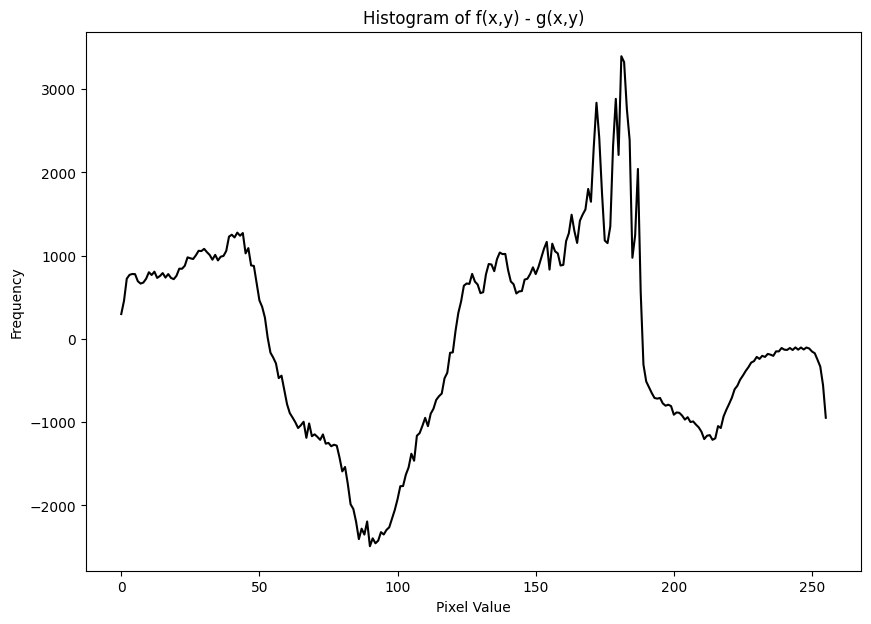

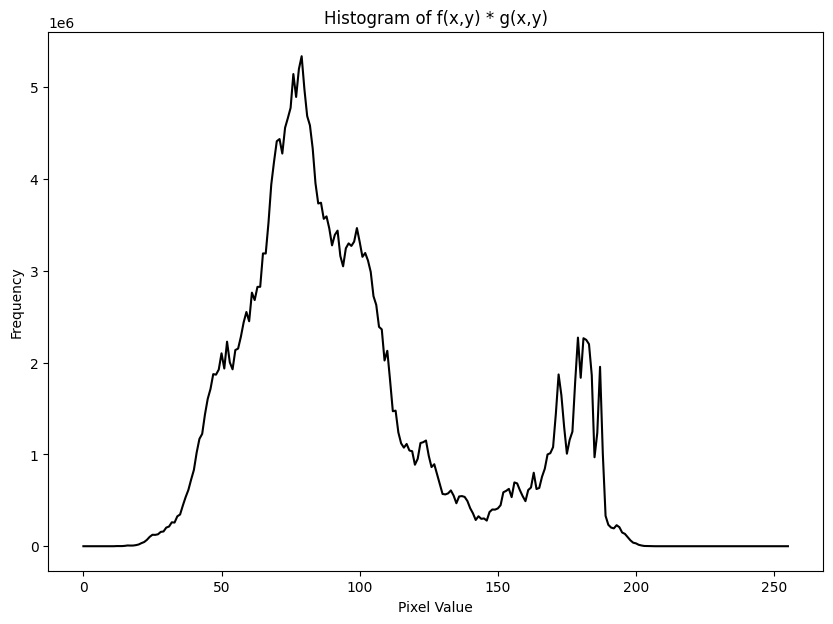

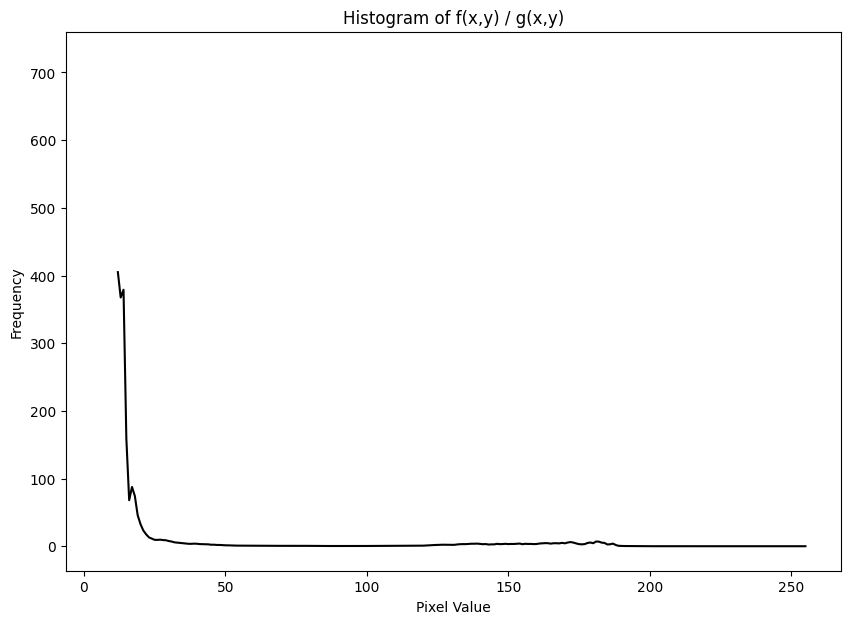

In [79]:
def operations(f, g):

    # Operation (a): f(x,y) + g(x,y)
    addition = cv2.add(f, g)
    plot_histogram(addition, 'Histogram of f(x,y) + g(x,y)')

    # Operation (b): f(x,y) - g(x,y)
    subtraction = cv2.subtract(f, g)
    plot_histogram(subtraction, 'Histogram of f(x,y) - g(x,y)')

    # Operation (c): f(x,y) * g(x,y)
    multiplication = cv2.multiply(f, g)
    plot_histogram(multiplication, 'Histogram of f(x,y) * g(x,y)')

    # Operation (d): f(x,y) / g(x,y)
    division = cv2.divide(f, g)
    plot_histogram(division, 'Histogram of f(x,y) / g(x,y)')

operations(hist_f, hist_g)